<a href="https://colab.research.google.com/github/NivratiKothari/Marketing-research-methods-Nivrati_Kothari-_-Jio-Institute/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn statsmodels


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Aggregate sales over different time periods
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

# Plot the trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Seasonal decomposition (Monthly Sales)
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Display the aggregated sales data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Sales Data", dataframe=monthly_sales.reset_index())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2961: invalid start byte

<ipython-input-3-f2118347d26d>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Sales']
<ipython-input-3-f2118347d26d>:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y').sum()['Sales']


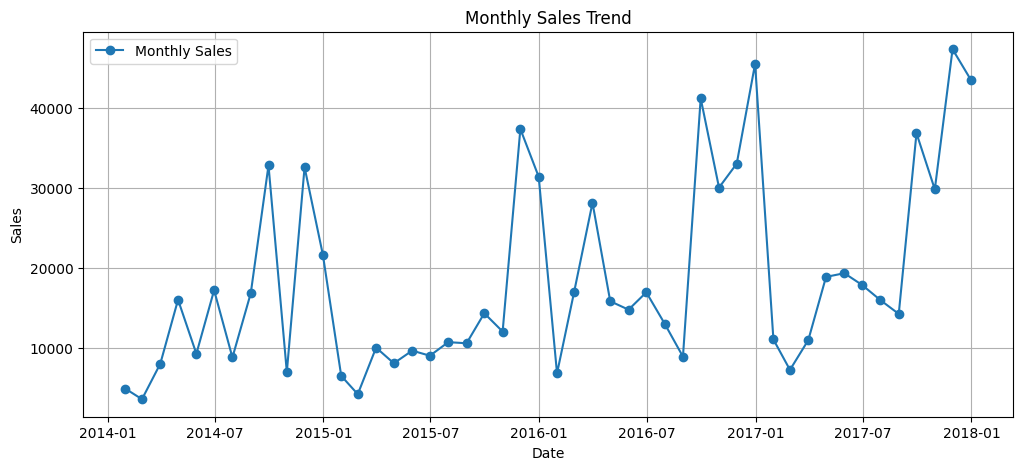

<Figure size 1200x800 with 0 Axes>

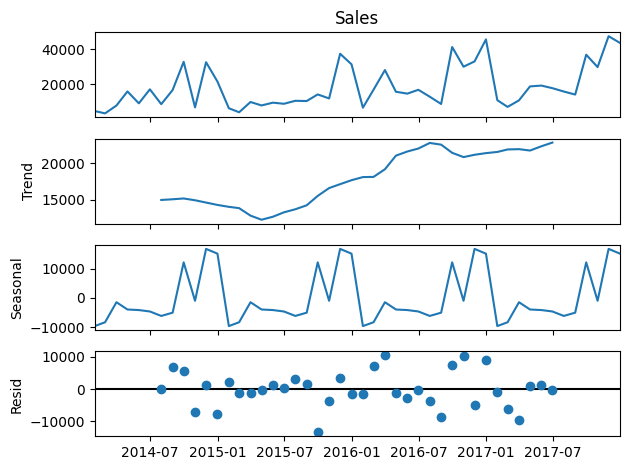

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset, specifying the encoding
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, encoding='latin-1') # or 'ISO-8859-1', or 'cp1252'

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Aggregate sales over different time periods
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

# Plot the trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Seasonal decomposition (Monthly Sales)
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Display the aggregated sales data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Sales Data", dataframe=monthly_sales.reset_index())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Aggregate sales over different time periods
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

# Aggregate profit and quantity for analysis
weekly_profit = df.resample('W').sum()['Profit']
monthly_profit = df.resample('M').sum()['Profit']
yearly_profit = df.resample('Y').sum()['Profit']

weekly_quantity = df.resample('W').sum()['Quantity']
monthly_quantity = df.resample('M').sum()['Quantity']
yearly_quantity = df.resample('Y').sum()['Quantity']

# --- Plot Sales Trends ---
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# --- Seasonal Decomposition for Sales ---
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# --- Correlation Analysis ---
correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# Display aggregated data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=monthly_sales.reset_index())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2961: invalid start byte

In [ ]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Try ISO-8859-1


In [ ]:
df = pd.read_csv(file_path, encoding='latin1')  # Alternative encoding


In [ ]:
pip install chardet


In [ ]:
import chardet

# Read a small portion of the file to detect encoding
with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Read first 10,000 bytes
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

# Load the CSV with detected encoding
df = pd.read_csv(file_path, encoding=detected_encoding)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.tsa.seasonal import seasonal_decompose

# STEP 1: Detect Encoding Automatically
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path

with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Read first 10,000 bytes
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

# Load the dataset with detected encoding
df = pd.read_csv(file_path, encoding=detected_encoding, errors='replace')

# STEP 2: Convert 'Order Date' to datetime and set index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# STEP 3: Aggregate Sales, Profit, and Quantity for Different Timeframes
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

weekly_profit = df.resample('W').sum()['Profit']
monthly_profit = df.resample('M').sum()['Profit']
yearly_profit = df.resample('Y').sum()['Profit']

weekly_quantity = df.resample('W').sum()['Quantity']
monthly_quantity = df.resample('M').sum()['Quantity']
yearly_quantity = df.resample('Y').sum()['Quantity']

# STEP 4: Plot Sales Trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# STEP 5: Seasonality Decomposition for Sales
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# STEP 6: Correlation Analysis Between Sales, Profit & Quantity
correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# Display Aggregated Data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=monthly_sales.reset_index())


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.tsa.seasonal import seasonal_decompose

# STEP 1: Detect Encoding Automatically
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path

with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Read first 10,000 bytes
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

# Load the dataset with detected encoding
df = pd.read_csv(file_path, encoding=detected_encoding, errors='replace')

# STEP 2: Convert 'Order Date' to datetime and set index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# STEP 3: Aggregate Sales, Profit, and Quantity for Different Timeframes
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

weekly_profit = df.resample('W').sum()['Profit']
monthly_profit = df.resample('M').sum()['Profit']
yearly_profit = df.resample('Y').sum()['Profit']

weekly_quantity = df.resample('W').sum()['Quantity']
monthly_quantity = df.resample('M').sum()['Quantity']
yearly_quantity = df.resample('Y').sum()['Quantity']

# STEP 4: Save Aggregated Data to CSV
aggregated_data = pd.DataFrame({
    "Weekly Sales": weekly_sales,
    "Monthly Sales": monthly_sales,
    "Yearly Sales": yearly_sales,
    "Weekly Profit": weekly_profit,
    "Monthly Profit": monthly_profit,
    "Yearly Profit": yearly_profit,
    "Weekly Quantity": weekly_quantity,
    "Monthly Quantity": monthly_quantity,
    "Yearly Quantity": yearly_quantity
})

# Save aggregated data
aggregated_data.to_csv("aggregated_time_series_data.csv")

# STEP 5: Plot Sales Trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# STEP 6: Seasonality Decomposition for Sales
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
seasonal_data = pd.DataFrame({
    "Trend": decomposition.trend,
    "Seasonal": decomposition.seasonal,
    "Residual": decomposition.resid
})

# Save seasonality data
seasonal_data.to_csv("seasonality_analysis.csv")

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# STEP 7: Correlation Analysis Between Sales, Profit & Quantity
correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

# Save correlation data
correlation_matrix.to_csv("correlation_analysis.csv")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# Display Aggregated Data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=aggregated_data.reset_index())


TypeError: read_csv() got an unexpected keyword argument 'errors'

<ipython-input-14-e8db85e7b1a9>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Sales']
<ipython-input-14-e8db85e7b1a9>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y').sum()['Sales']
<ipython-input-14-e8db85e7b1a9>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df.resample('M').sum()['Profit']
<ipython-input-14-e8db85e7b1a9>:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_profit = df.resample('Y').sum()['Profit']
<ipython-input-14-e8db85e7b1a9>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_quantity = df.resample('M').sum()['Quantity']
<ipython-input-14-e8db85e7b1a9>:33: FutureWarning: 'Y' is deprecate

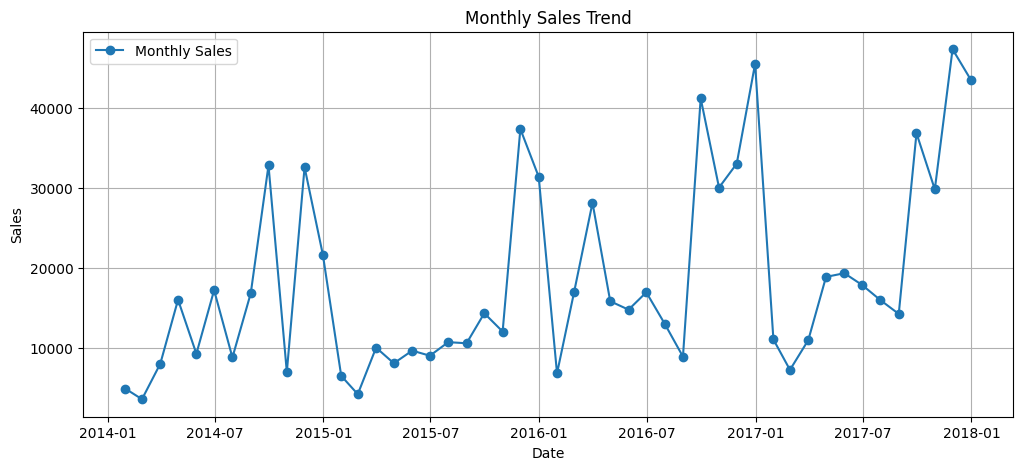

<Figure size 1200x800 with 0 Axes>

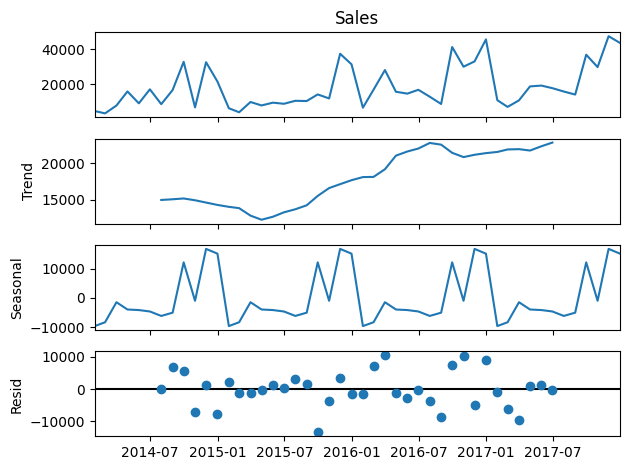

<ipython-input-14-e8db85e7b1a9>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()


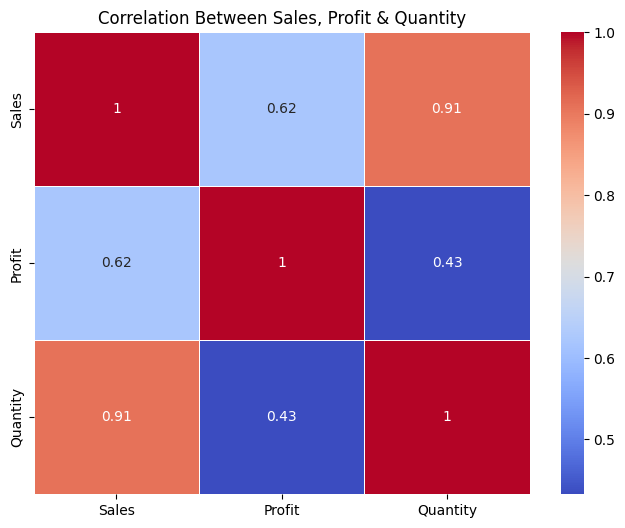

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.tsa.seasonal import seasonal_decompose

# STEP 1: Detect Encoding Automatically
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path

with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Read first 10,000 bytes
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

# Load the dataset with detected encoding (fixing previous error)
df = pd.read_csv(file_path, encoding=detected_encoding)

# STEP 2: Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# STEP 3: Aggregate Sales, Profit, and Quantity for Different Timeframes
weekly_sales = df.resample('W').sum()['Sales']
monthly_sales = df.resample('M').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

weekly_profit = df.resample('W').sum()['Profit']
monthly_profit = df.resample('M').sum()['Profit']
yearly_profit = df.resample('Y').sum()['Profit']

weekly_quantity = df.resample('W').sum()['Quantity']
monthly_quantity = df.resample('M').sum()['Quantity']
yearly_quantity = df.resample('Y').sum()['Quantity']

# STEP 4: Save Aggregated Data to CSV
aggregated_data = pd.DataFrame({
    "Weekly Sales": weekly_sales,
    "Monthly Sales": monthly_sales,
    "Yearly Sales": yearly_sales,
    "Weekly Profit": weekly_profit,
    "Monthly Profit": monthly_profit,
    "Yearly Profit": yearly_profit,
    "Weekly Quantity": weekly_quantity,
    "Monthly Quantity": monthly_quantity,
    "Yearly Quantity": yearly_quantity
})

# Save aggregated data
aggregated_data.to_csv("aggregated_time_series_data.csv")

# STEP 5: Plot Sales Trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label="Monthly Sales", marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# STEP 6: Seasonality Decomposition for Sales
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
seasonal_data = pd.DataFrame({
    "Trend": decomposition.trend,
    "Seasonal": decomposition.seasonal,
    "Residual": decomposition.resid
})

# Save seasonality data
seasonal_data.to_csv("seasonality_analysis.csv")

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# STEP 7: Correlation Analysis Between Sales, Profit & Quantity
correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

# Save correlation data
correlation_matrix.to_csv("correlation_analysis.csv")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# Display Aggregated Data
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=aggregated_data.reset_index())


<ipython-input-15-9d3cd90868f1>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y').sum()['Sales']
<ipython-input-15-9d3cd90868f1>:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_profit = df.resample('Y').sum()['Profit']
<ipython-input-15-9d3cd90868f1>:33: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_quantity = df.resample('Y').sum()['Quantity']


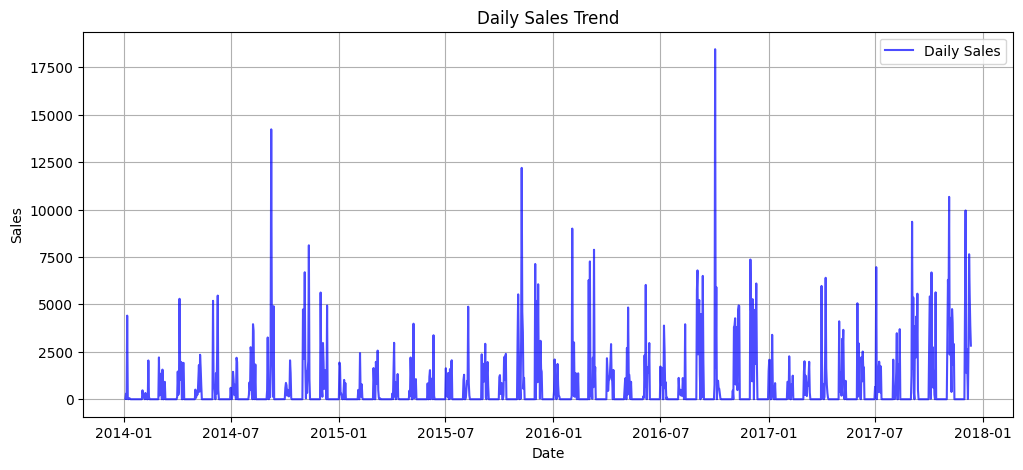

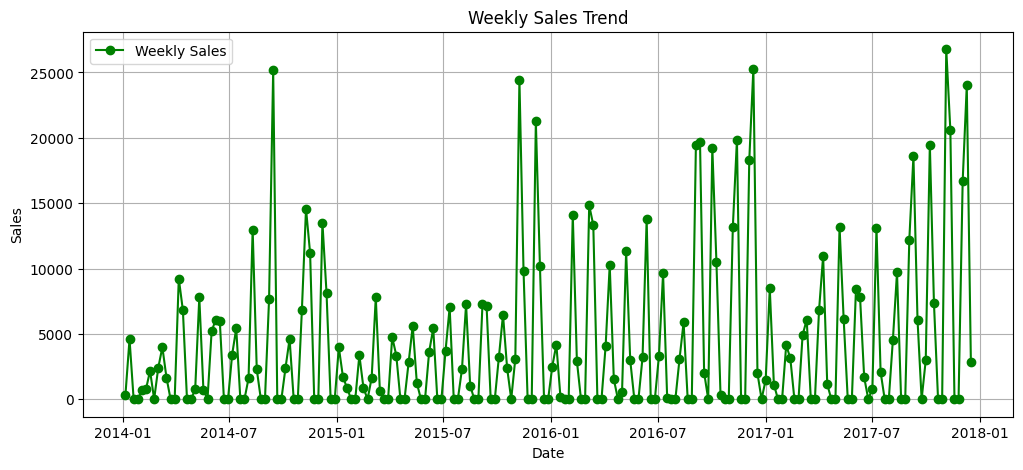

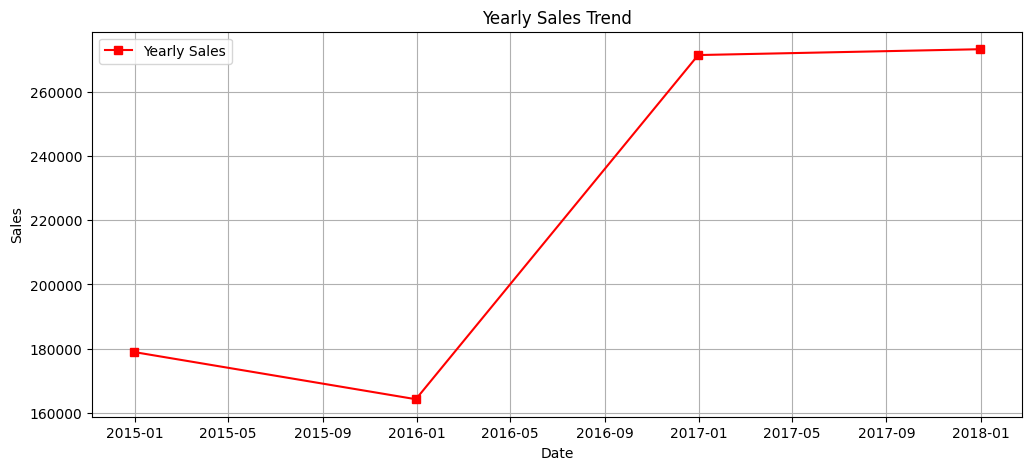

<Figure size 1200x800 with 0 Axes>

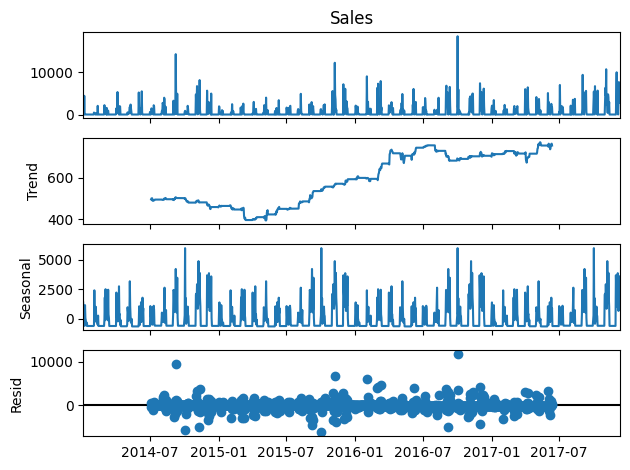

<ipython-input-15-9d3cd90868f1>:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()


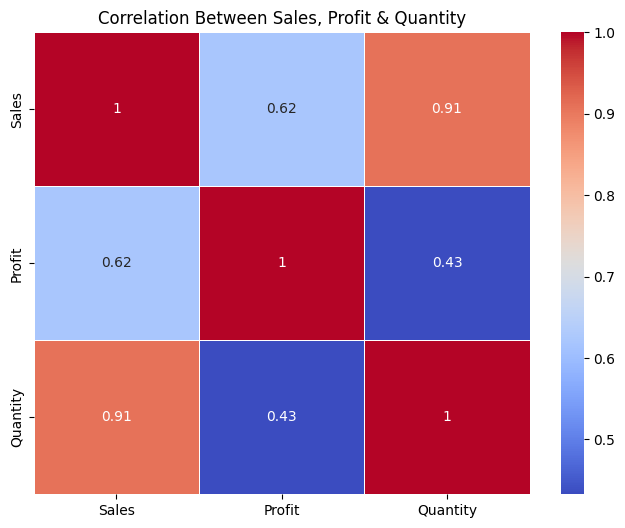

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from statsmodels.tsa.seasonal import seasonal_decompose

# STEP 1: Detect Encoding Automatically
file_path = "/content/Superstore - store analysis.csv"  # Change this to your actual file path

with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Read first 10,000 bytes
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']

# Load the dataset with detected encoding
df = pd.read_csv(file_path, encoding=detected_encoding)

# STEP 2: Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# STEP 3: Aggregate Sales, Profit, and Quantity for Different Timeframes
daily_sales = df.resample('D').sum()['Sales']
weekly_sales = df.resample('W').sum()['Sales']
yearly_sales = df.resample('Y').sum()['Sales']

daily_profit = df.resample('D').sum()['Profit']
weekly_profit = df.resample('W').sum()['Profit']
yearly_profit = df.resample('Y').sum()['Profit']

daily_quantity = df.resample('D').sum()['Quantity']
weekly_quantity = df.resample('W').sum()['Quantity']
yearly_quantity = df.resample('Y').sum()['Quantity']

# STEP 4: Save Aggregated Data to CSV
aggregated_data = pd.DataFrame({
    "Daily Sales": daily_sales,
    "Weekly Sales": weekly_sales,
    "Yearly Sales": yearly_sales,
    "Daily Profit": daily_profit,
    "Weekly Profit": weekly_profit,
    "Yearly Profit": yearly_profit,
    "Daily Quantity": daily_quantity,
    "Weekly Quantity": weekly_quantity,
    "Yearly Quantity": yearly_quantity
})

# Save aggregated data
aggregated_data.to_csv("aggregated_time_series_data.csv")

# --- STEP 5: PLOT TRENDS ---

# Daily Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, label="Daily Sales", color='blue', linestyle='-', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Weekly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_sales, label="Weekly Sales", color='green', marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# Yearly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(yearly_sales, label="Yearly Sales", color='red', marker='s', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Yearly Sales Trend")
plt.legend()
plt.grid()
plt.show()

# --- STEP 6: SEASONALITY ANALYSIS ---

# Seasonal Decomposition for Sales
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
seasonal_data = pd.DataFrame({
    "Trend": decomposition.trend,
    "Seasonal": decomposition.seasonal,
    "Residual": decomposition.resid
})

# Save seasonality data
seasonal_data.to_csv("seasonality_analysis.csv")

# Plot Seasonality Components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# --- STEP 7: CORRELATION ANALYSIS ---

correlation_data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
correlation_matrix = correlation_data.corr()

# Save correlation data
correlation_matrix.to_csv("correlation_analysis.csv")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Profit & Quantity")
plt.show()

# --- STEP 8: DISPLAY RESULTS ---
import ace_tools as tools
tools.display_dataframe_to_user(name="Aggregated Time Series Data", dataframe=aggregated_data.reset_index())
